# Netflix Case Study

**Business Problem**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

**Show\_id:** Unique ID for every Movie / Tv Show  
**Type:** Identifier - A Movie or TV Show  
**Title:** Title of the Movie / Tv Show  
**Director:** Director of the Movie  
**Cast:** Actors involved in the movie/show  
**Country:** Country where the movie/show was produced  
**Date\_added:** Date it was added on Netflix  
**Release\_year:** Actual Release year of the movie/show  
**Rating:** TV Rating of the movie/show  
**Duration:** Total Duration - in minutes or number of seasons  
**Listed\_in:** Genre  
**Description:** The summary description

**Hints**

1.  The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
2.  Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
3.  Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
4.  Start by exploring a few questions: What type of content is available in different countries?
    1.  How has the number of movies released per year changed over the last 20-30 years?
    2.  Comparison of tv shows vs. movies.
    3.  What is the best time to launch a TV show?
    4.  Analysis of actors/directors of different types of shows/movies.
    5.  Does Netflix has more focus on TV Shows than movies in recent years
    6.  Understanding what content is available in different countries

**Evaluation Criteria (100 Points):**

1\. Defining Problem Statement and Analysing basic metrics **(10 Points)**

2\. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary **(10 Points)**

3\. Non-Graphical Analysis: Value counts and unique attributes ​​**(10 Points)**

4\. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis **(10 Points)**

4.2 For categorical variable(s): Boxplot **(10 Points)**

4.3 For correlation: Heatmaps, Pairplots **(10 Points)**

5\. Missing Value & Outlier check (Treatment optional) **(10 Points)**

6\. Insights based on Non-Graphical and Visual Analysis **(10 Points)**

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

7\. Business Insights **(10 Points)** - Should include patterns observed in the data along with what you can infer from it

8\. Recommendations **(10 Points)** - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand


In [274]:
import pandas as pd
import numpy as np
import duckdb
import seaborn as sns
import matplotlib.gridspec as gridspec
import pickle
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set_style('darkgrid')

## Data Cleaning and Splitting

In [275]:
df=pd.read_csv('./netflix.csv')
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7808,s7809,TV Show,Qué pena tu serie,NaN,"Ariel Levy, Andrea Velasco, Lucy Cominetti, Ig...",United States,"November 4, 2016",2015,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, Spa...","Javier is happily in love with Sofia, so when ..."
4208,s4209,Movie,GODZILLA The Planet Eater,"Kobun Shizuno, Hiroyuki Seshita","Mamoru Miyano, Takahiro Sakurai, Kana Hanazawa...",Japan,"January 9, 2019",2018,TV-PG,91 min,"Action & Adventure, Anime Features, Internatio...","With the earth alliance weakened, Haruo weighs..."
2711,s2712,Movie,Money Heist: The Phenomenon,"Pablo Lejarreta, Luis Alfaro",NaN,Spain,"April 3, 2020",2020,TV-MA,57 min,"Documentaries, International Movies","A documentary on why and how ""Money Heist"" spa..."
7523,s7524,Movie,Mud,Jeff Nichols,"Matthew McConaughey, Reese Witherspoon, Tye Sh...",United States,"January 1, 2021",2012,PG-13,131 min,"Dramas, Independent Movies",Two Mississippi teens meet peculiar drifter Mu...
2113,s2114,TV Show,High Score,NaN,NaN,United States,"August 19, 2020",2020,TV-14,1 Season,"Docuseries, Science & Nature TV",This docuseries traces the history of classic ...
2078,s2079,TV Show,The Promised Neverland,NaN,"Sumire Morohoshi, Maaya Uchida, Mariya Ise, Yu...",Japan,"September 1, 2020",2019,TV-14,1 Season,"Anime Series, International TV Shows, TV Thril...",When three gifted kids learn that their isolat...
2805,s2806,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",2016,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc..."
8665,s8666,Movie,Urvi,Pradeep Verma,"Sruthi Hariharan, Shraddha Srinath, Shweta Pan...",India,"January 15, 2018",2017,TV-MA,121 min,"Dramas, Independent Movies, International Movies",After getting tricked into working at a brothe...
2650,s2651,Movie,Time to Hunt,Yoon Sung-hyun,"Lee Je-hoon, Ahn Jae-hong, Choi Woo-shik, Park...",South Korea,"April 23, 2020",2020,TV-MA,135 min,"International Movies, Thrillers",Wanting to leave their dystopian world behind ...
1976,s1977,Movie,The Royal Bengal Tiger,Rajesh Ganguly,"Jeet, Abir Chatterjee, Priyanka Sarkar, Shradh...",India,"September 19, 2020",2014,TV-MA,103 min,"Dramas, International Movies, Thrillers","Knocked down by life one too many times, a mee..."


In [276]:
df = df.drop(["description","title"], axis=1)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [278]:
df.isna().sum()

show_id            0
type               0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [279]:
df["type"].value_counts()
print("=====================")
df["rating"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [280]:
df["type"]=df["type"].astype("category")

In [281]:
mask=df["rating"].isin(["74 min","84 min","66 min"])
df.loc[mask, "duration"] = df.loc[mask, "rating"]
df.loc[mask, "rating"] = df["rating"].mode().iloc[0]

df["rating"]=df["rating"].fillna(df["rating"].mode().iloc[0])

In [282]:
df["date_added"] = pd.to_datetime(df["date_added"] , format='%B %d, %Y', errors="coerce")
df["date_added_year_month"] = df["date_added"].dt.strftime('%Y-%m')

In [283]:
df.sample(10)

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,date_added_year_month
5238,s5239,Movie,Carlos Therón,"Jose Coronado, Javier Cámara, Roberto Álamo, P...",Spain,2017-10-01,2017,TV-MA,93 min,"Comedies, International Movies",2017-10
6646,s6647,TV Show,NaN,"Liv Hewson, Sean Dulake, Justin Chon, Noo-Ri B...","United States, South Korea, China",2016-05-23,2016,TV-14,1 Season,"Romantic TV Shows, TV Comedies, TV Dramas",2016-05
1480,s1481,TV Show,NaN,"Ford Kiernan, Paul Riley, Jane McCarry, Greg H...",United Kingdom,2020-12-30,2018,TV-14,9 Seasons,"British TV Shows, Classic & Cult TV, Internati...",2020-12
1983,s1984,TV Show,NaN,"Greg Chun, Erica Mendez, Cristina Vee, David L...",NaN,2020-09-17,2020,TV-MA,1 Season,"Anime Series, International TV Shows",2020-09
5870,s5871,TV Show,NaN,NaN,NaN,2016-02-01,2012,TV-Y,1 Season,Kids' TV,2016-02
3159,s3160,Movie,Sameh Abdulaziz,"Ali Rabee, Mohamed Abdel-Rahman, Bayoumi Fouad...",Egypt,2019-12-10,2017,TV-14,101 min,"Comedies, International Movies",2019-12
1584,s1585,Movie,Tate Taylor,"Jessica Chastain, Colin Farrell, John Malkovic...",United States,2020-12-07,2020,R,97 min,"Action & Adventure, Dramas",2020-12
4881,s4882,Movie,John Woo,"Zhang Hanyu, Masaharu Fukuyama, Qi Wei, Ji-won...","China, Hong Kong",2018-05-04,2017,TV-MA,109 min,"Action & Adventure, International Movies",2018-05
5748,s5749,Movie,Noriyuki Abe,"Masakazu Morita, Fumiko Orikasa, Aya Hirano, H...",Japan,2016-10-15,2008,TV-PG,94 min,"Action & Adventure, Anime Features, Sci-Fi & F...",2016-10
2600,s2601,TV Show,NaN,"Catherine Bell, Bailee Madison, Rhys Matthew B...","United States, Canada",2020-04-30,2019,TV-PG,5 Seasons,"TV Dramas, TV Sci-Fi & Fantasy",2020-04


In [284]:
# df.set_index('show_id')['cast'].str.split(', ', expand=True).stack().reset_index(name='cast').drop('level_1', axis=1)

In [285]:
cast=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
cast_df=pd.DataFrame(cast,index=df['show_id'])
cast_df=cast_df.stack().reset_index(name='cast').drop('level_1', axis=1).set_index('show_id')
cast_df.replace("nan", float('nan'), inplace=True)
# mask = cast_df[cast_df['cast'] == ''].index
# cast_df.drop(mask, inplace=True)
cast_df

director=df['director'].apply(lambda x: str(x).split(', ')).tolist()
director_df=pd.DataFrame(director,index=df['show_id'])
director_df=director_df.stack().reset_index(name='director').drop('level_1', axis=1).set_index('show_id')
director_df.replace("nan", float('nan'), inplace=True)
director_df

country=df['country'].apply(lambda x: str(x).split(', ')).tolist()
country_df=pd.DataFrame(country,index=df['show_id'])
country_df=country_df.stack().reset_index(name='country').drop('level_1', axis=1).set_index('show_id')
country_df.replace("nan", float('nan'), inplace=True)
mask = country_df[country_df['country'] == ''].index
country_df.drop(mask, inplace=True)
# country_df.replace(" ", float('nan'), inplace=True)
country_df

listed=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
listed_df=pd.DataFrame(listed,index=df['show_id'])
listed_df=listed_df.stack().reset_index(name='listed_in').drop('level_1', axis=1).set_index('show_id')
listed_df.replace("nan", float('nan'), inplace=True)
listed_df

,cast
show_id,
s1,NaN
s2,Ama Qamata
s2,Khosi Ngema
s2,Gail Mabalane
s2,Thabang Molaba
...,...
s8807,Manish Chaudhary
s8807,Meghna Malik
s8807,Malkeet Rauni


,director
show_id,
s1,Kirsten Johnson
s2,NaN
s3,Julien Leclercq
s4,NaN
s5,NaN
...,...
s8803,David Fincher
s8804,NaN
s8805,Ruben Fleischer


,country
show_id,
s1,United States
s2,South Africa
s3,NaN
s4,NaN
s5,India
...,...
s8803,United States
s8804,NaN
s8805,United States


,listed_in
show_id,
s1,Documentaries
s2,International TV Shows
s2,TV Dramas
s2,TV Mysteries
s3,Crime TV Shows
...,...
s8806,Children & Family Movies
s8806,Comedies
s8807,Dramas


In [286]:
df.drop(["cast","country","director","listed_in"], axis=1, inplace=True)

In [287]:
mask=df["date_added"].isna()

In [288]:
mask

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: date_added, Length: 8807, dtype: bool

In [289]:
df[mask]

,show_id,type,date_added,release_year,rating,duration,date_added_year_month
6066,s6067,TV Show,NaT,2013,TV-MA,2 Seasons,NaN
6079,s6080,TV Show,NaT,2017,TV-PG,2 Seasons,NaN
6174,s6175,TV Show,NaT,2018,TV-PG,5 Seasons,NaN
6177,s6178,TV Show,NaT,2012,TV-Y7,2 Seasons,NaN
6213,s6214,TV Show,NaT,2014,TV-MA,3 Seasons,NaN
...,...,...,...,...,...,...,...
8539,s8540,TV Show,NaT,2010,TV-MA,4 Seasons,NaN
8557,s8558,TV Show,NaT,2005,TV-14,7 Seasons,NaN
8684,s8685,TV Show,NaT,2016,TV-Y,3 Seasons,NaN
8712,s8713,TV Show,NaT,2016,TV-PG,2 Seasons,NaN


In [290]:
import datetime
datetime.date(2006, 1, 1)

datetime.date(2006, 1, 1)

In [291]:
df.loc[mask, "date_added"] = df.loc[mask, "release_year"].apply(lambda x: max(pd.to_datetime(x + 1, format="%Y"), pd.Timestamp(datetime.date(2006, 1, 1))).date() )

In [292]:
df["duration"]=df["duration"].apply(lambda x: x.split(" ")[0])

df["date_added_year"]=df["date_added"].dt.year
df["date_added_month"]=df["date_added"].dt.month
df["date_added_month_name"]=df["date_added"].dt.month_name()
df["dat_added_period"]=pd.cut(df["date_added_year"], bins=[0,2005, 2010, 2015,2022 ], labels=["2005","2006-2010","2011-2015","2016-2022"])

movies_df=df.loc[df["type"]=="Movie"]
tv_shows_df=df.loc[df["type"]=="TV Show"]
movies_df.head()
tv_shows_df.head()

,show_id,type,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,dat_added_period
0,s1,Movie,2021-09-25,2020,PG-13,90,2021-09,2021,9,September,2016-2022
6,s7,Movie,2021-09-24,2021,PG,91,2021-09,2021,9,September,2016-2022
7,s8,Movie,2021-09-24,1993,TV-MA,125,2021-09,2021,9,September,2016-2022
9,s10,Movie,2021-09-24,2021,PG-13,104,2021-09,2021,9,September,2016-2022
12,s13,Movie,2021-09-23,2021,TV-MA,127,2021-09,2021,9,September,2016-2022


,show_id,type,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,dat_added_period
1,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022
2,s3,TV Show,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,2016-2022
3,s4,TV Show,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,2016-2022
4,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022
5,s6,TV Show,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,2016-2022


In [293]:
country_df.value_counts()
print("=====================")
cast_df.value_counts()
print("=====================")
director_df.value_counts()

country       
United States     3689
India             1046
United Kingdom     804
Canada             445
France             392
                  ... 
Kazakhstan           1
Jamaica              1
Slovakia             1
Ethiopia             1
Afghanistan          1
Name: count, Length: 126, dtype: int64

cast               
Anupam Kher            43
Shah Rukh Khan         35
Julie Tejwani          33
Naseeruddin Shah       32
Takahiro Sakurai       32
                       ..
Chinmay Kambli          1
Kumiko Aso              1
Kumarakom Vasudevan     1
Kumar Varun             1
Ṣọpẹ́ Dìrísù            1
Name: count, Length: 36439, dtype: int64

director               
Rajiv Chilaka              22
Jan Suter                  21
Raúl Campos                19
Suhas Kadav                16
Marcus Raboy               16
                           ..
Brandon Camp                1
Juan Antin                  1
Juan Antonio de la Riva     1
Juan Camilo Pinzon          1
María Jose Cuevas           1
Name: count, Length: 4993, dtype: int64

In [294]:
country_df["country"].mode().iloc[0]

'United States'

In [295]:
director_df.fillna("Unknown", inplace=True)
cast_df.fillna("Unknown", inplace=True)
country_df=country_df.fillna('Unknown')

In [296]:
director_df.head()

,director
show_id,
s1,Kirsten Johnson
s2,Unknown
s3,Julien Leclercq
s4,Unknown
s5,Unknown


In [297]:
country_df.reset_index(inplace=True)
cast_df.reset_index(inplace=True)
listed_df.reset_index(inplace=True)
director_df.reset_index(inplace=True)

In [298]:
country_df.isna().sum()
director_df.isna().sum()
listed_df.isna().sum()
tv_shows_df.isna().sum()
movies_df.isna().sum()
df.isna().sum()
cast_df.isna().sum()

show_id    0
country    0
dtype: int64

show_id     0
director    0
dtype: int64

show_id      0
listed_in    0
dtype: int64

show_id                   0
type                      0
date_added                0
release_year              0
rating                    0
duration                  0
date_added_year_month    98
date_added_year           0
date_added_month          0
date_added_month_name     0
dat_added_period          0
dtype: int64

show_id                  0
type                     0
date_added               0
release_year             0
rating                   0
duration                 0
date_added_year_month    0
date_added_year          0
date_added_month         0
date_added_month_name    0
dat_added_period         0
dtype: int64

show_id                   0
type                      0
date_added                0
release_year              0
rating                    0
duration                  0
date_added_year_month    98
date_added_year           0
date_added_month          0
date_added_month_name     0
dat_added_period          0
dtype: int64

show_id    0
cast       0
dtype: int64

In [299]:
country_df.to_csv("country.csv", index=False)
director_df.to_csv("director.csv", index=False)
cast_df.to_csv("cast.csv", index=False)
listed_df.to_csv("listed.csv", index=False)
df.to_csv("data.csv", index=False)
movies_df.to_csv("movies.csv", index=False)
tv_shows_df.to_csv("tv_shows.csv", index=False)

## EDA

In [300]:
country_df=pd.read_csv("./country.csv")
cast_df=pd.read_csv("./cast.csv")
listed_df=pd.read_csv("./listed.csv")
movies_df=pd.read_csv("./movies.csv", parse_dates=["date_added"])
tv_shows_df=pd.read_csv("./tv_shows.csv",parse_dates=["date_added"])
director_df=pd.read_csv("./director.csv")
df=pd.read_csv("./data.csv",parse_dates=["date_added"])
df["type"]=df["type"].astype("category")
movies_df["type"]=movies_df["type"].astype("category")
tv_shows_df["type"]=tv_shows_df["type"].astype("category")

### Country Analysis

In [301]:
country_df.describe()

,show_id,country
count,10840,10840
unique,8805,127
top,s6234,United States
freq,12,3689


In [302]:
cdf=country_df["country"].value_counts()[:10]
cdf

country
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             392
Japan              318
Spain              232
South Korea        230
Germany            226
Name: count, dtype: int64

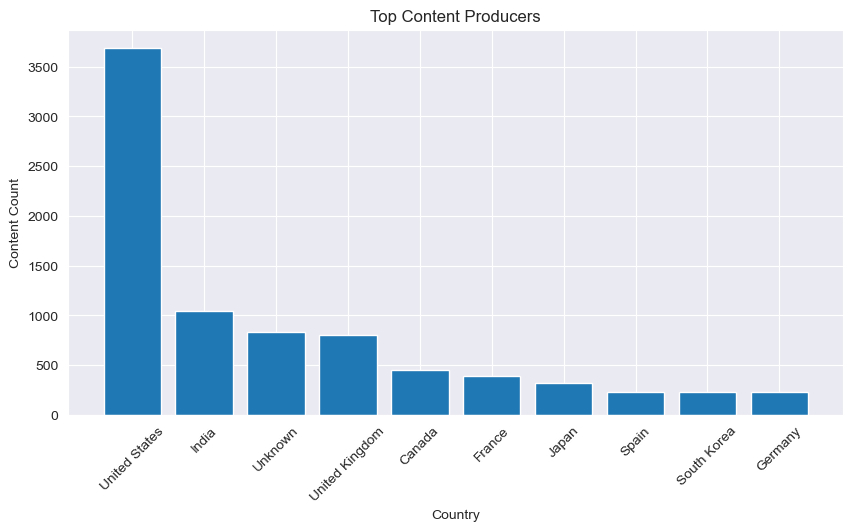

In [303]:
plt.figure(figsize=(10,5))
plt.bar(cdf.index,cdf)
plt.xticks(rotation=45)
plt.ylabel("Content Count")
plt.xlabel("Country")
plt.title("Top Content Producers");

**<mark>Insights</mark>**

- From above graph we can see that USA, India and UK are top content producers.
- Countries like Canada, France, Japan, Spain, South Korea and Germany have moderate of scope for improvement.

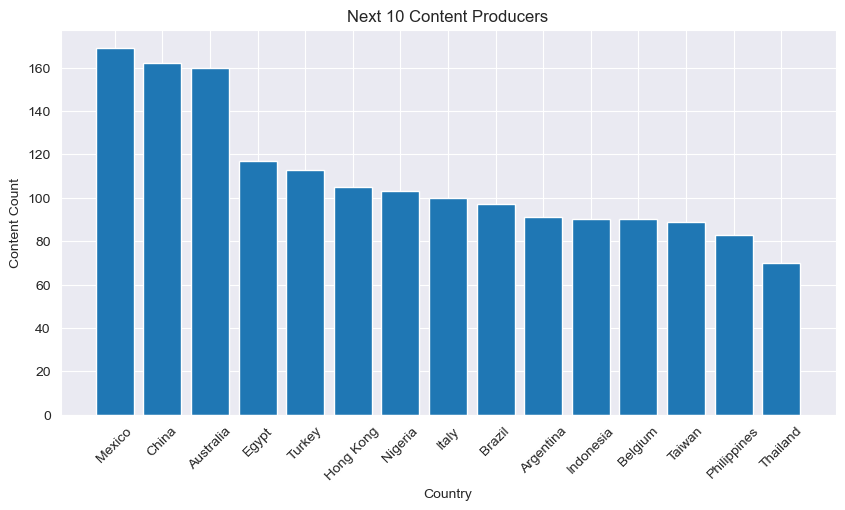

In [304]:
cdf=country_df["country"].value_counts()[10:25]
plt.figure(figsize=(10,5))
plt.bar(cdf.index,cdf)
plt.xticks(rotation=45)
plt.ylabel("Content Count")
plt.xlabel("Country")
plt.title("Next 10 Content Producers");

**<mark>Insights</mark>**

- Above graph shows the list of countries that have a lot of scope for improvement.
- In following analyses, we will draw insights on how can we improve the content or what type of content to produce using above countries

In [305]:
non_top_3_countrries = country_df["country"].value_counts()[4:25].index.tolist()
non_top_3_countrries

['Canada',
 'France',
 'Japan',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico',
 'China',
 'Australia',
 'Egypt',
 'Turkey',
 'Hong Kong',
 'Nigeria',
 'Italy',
 'Brazil',
 'Argentina',
 'Indonesia',
 'Belgium',
 'Taiwan',
 'Philippines',
 'Thailand']

**<mark>Insights</mark>**

- We will focus on above countries the most as there is a higher chance of growth if we invest in producing content for them

### Cast Analysis

In [306]:
cast_df.describe()

,show_id,cast
count,64951,64951
unique,8807,36440
top,s1855,Unknown
freq,50,825


In [307]:
merge_df=df.merge(cast_df,on='show_id',how='inner')
merge_df.head()

,show_id,type,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,dat_added_period,cast
0,s1,Movie,2021-09-25,2020,PG-13,90,2021-09,2021,9,September,2016-2022,Unknown
1,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,Ama Qamata
2,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,Khosi Ngema
3,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,Gail Mabalane
4,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,Thabang Molaba


In [308]:
cdf = cast_df["cast"].value_counts()[:11].reset_index()
cdf

,cast,count
0,Unknown,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29


**<mark>Insights</mark>**

- Above table shows the list of top cast present in movies and tv shows
- There is lot of missing values in this data, which have been replaced by "Unknown"

In [309]:
cdf = cdf.iloc[1:11]
mdf=merge_df.loc[merge_df["type"]=="Movie"]["cast"].value_counts()[1:11].reset_index()
tdf=merge_df.loc[merge_df["type"]=="TV Show"]["cast"].value_counts()[1:11].reset_index()
cdf
mdf
tdf

,cast,count
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29
10,Amitabh Bachchan,28


,cast,count
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Om Puri,30
4,Akshay Kumar,30
5,Paresh Rawal,28
6,Julie Tejwani,28
7,Amitabh Bachchan,28
8,Rupa Bhimani,27
9,Boman Irani,27


,cast,count
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Daisuke Ono,17
3,Junichi Suwabe,17
4,Ai Kayano,17
5,Yuichi Nakamura,16
6,Yoshimasa Hosoya,15
7,Jun Fukuyama,15
8,David Attenborough,14
9,Yoshitsugu Matsuoka,13


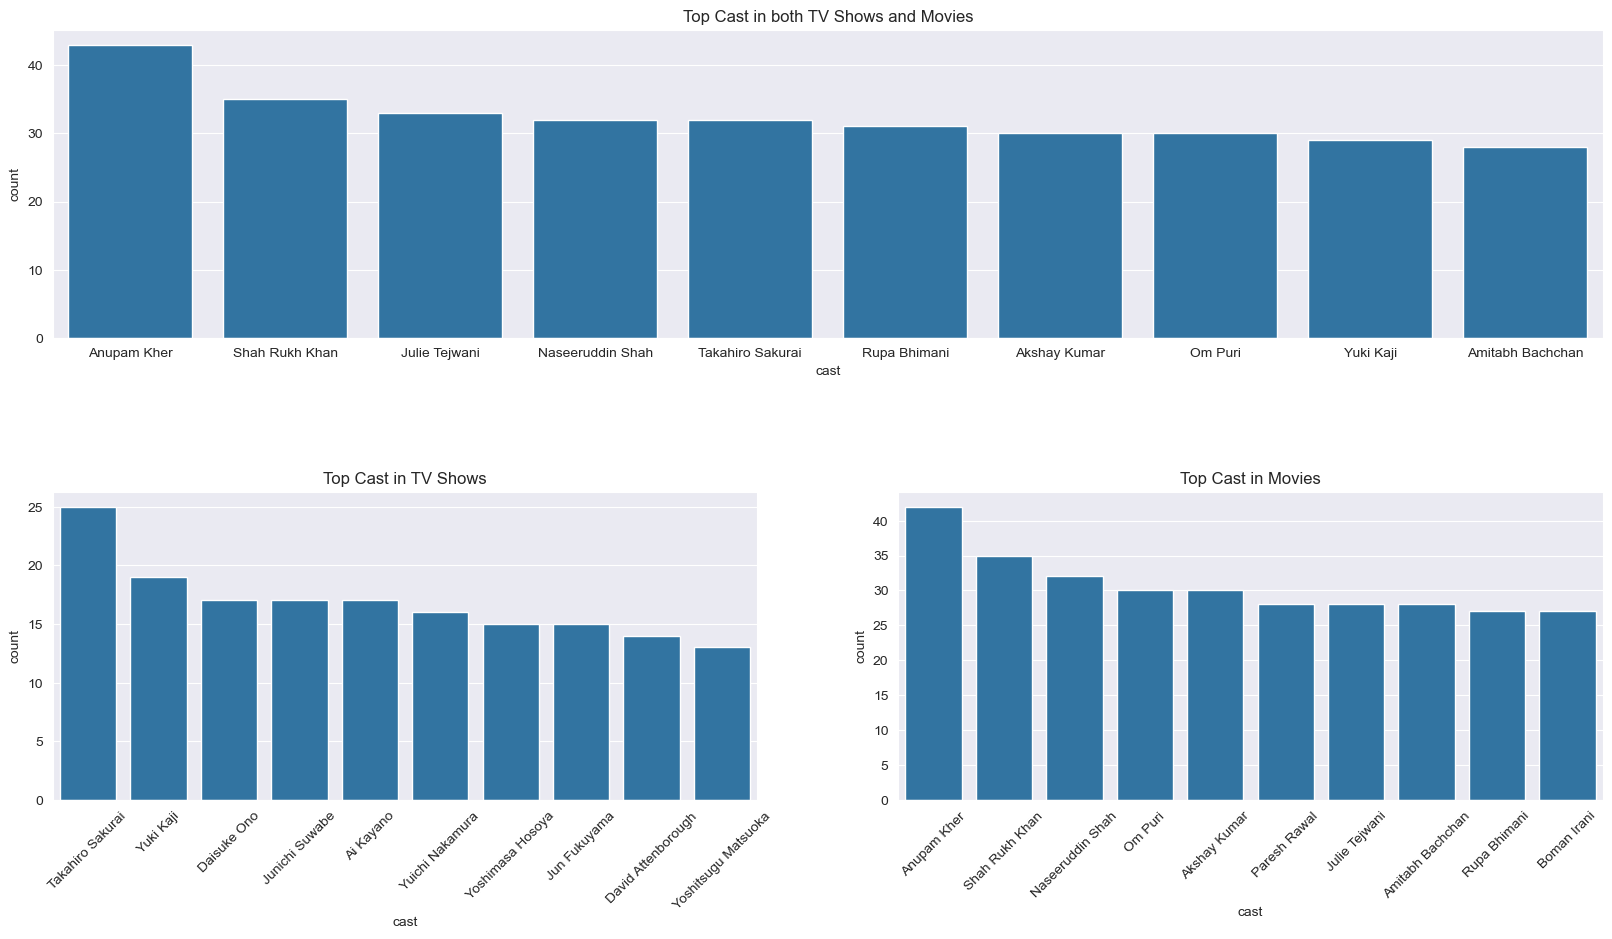

In [310]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.5)


ax1 = plt.subplot(gs[0, :])
sns.barplot(data=cdf, x="cast", y="count", ax=ax1)
# ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title("Top Cast in both TV Shows and Movies")

ax2 = plt.subplot(gs[1, 0])
sns.barplot(data=tdf, x="cast", y="count", ax=ax2)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title("Top Cast in TV Shows")


ax3 = plt.subplot(gs[1, 1])
sns.barplot(data=mdf, x="cast", y="count", ax=ax3)
ax3.set_title("Top Cast in Movies")
ax3.tick_params(axis='x', labelrotation=45);


**<mark>Insights</mark>**

- Above visuals shows the list of top cast present in movies and tv shows
- There appears to be lot of Indian actors in the movies section 


### Genre Analysis

In [311]:
listed_df.describe()

,show_id,listed_in
count,19323,19323
unique,8807,42
top,s8807,International Movies
freq,3,2752


In [312]:
ldf=listed_df["listed_in"].value_counts()[:10].reset_index()
ldf

,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


In [313]:
merge_df=df.merge(listed_df,on='show_id',how='inner')
merge_df.head()

,show_id,type,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,dat_added_period,listed_in
0,s1,Movie,2021-09-25,2020,PG-13,90,2021-09,2021,9,September,2016-2022,Documentaries
1,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,International TV Shows
2,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,TV Dramas
3,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,TV Mysteries
4,s3,TV Show,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,2016-2022,Crime TV Shows


In [314]:
mdf=merge_df.loc[merge_df["type"]=="Movie"]["listed_in"].value_counts()[:10].reset_index()
tdf=merge_df.loc[merge_df["type"]=="TV Show"]["listed_in"].value_counts()[:10].reset_index()
ldf
mdf
tdf

,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


,listed_in,count
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451
5,Docuseries,395
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,253
9,Anime Series,176


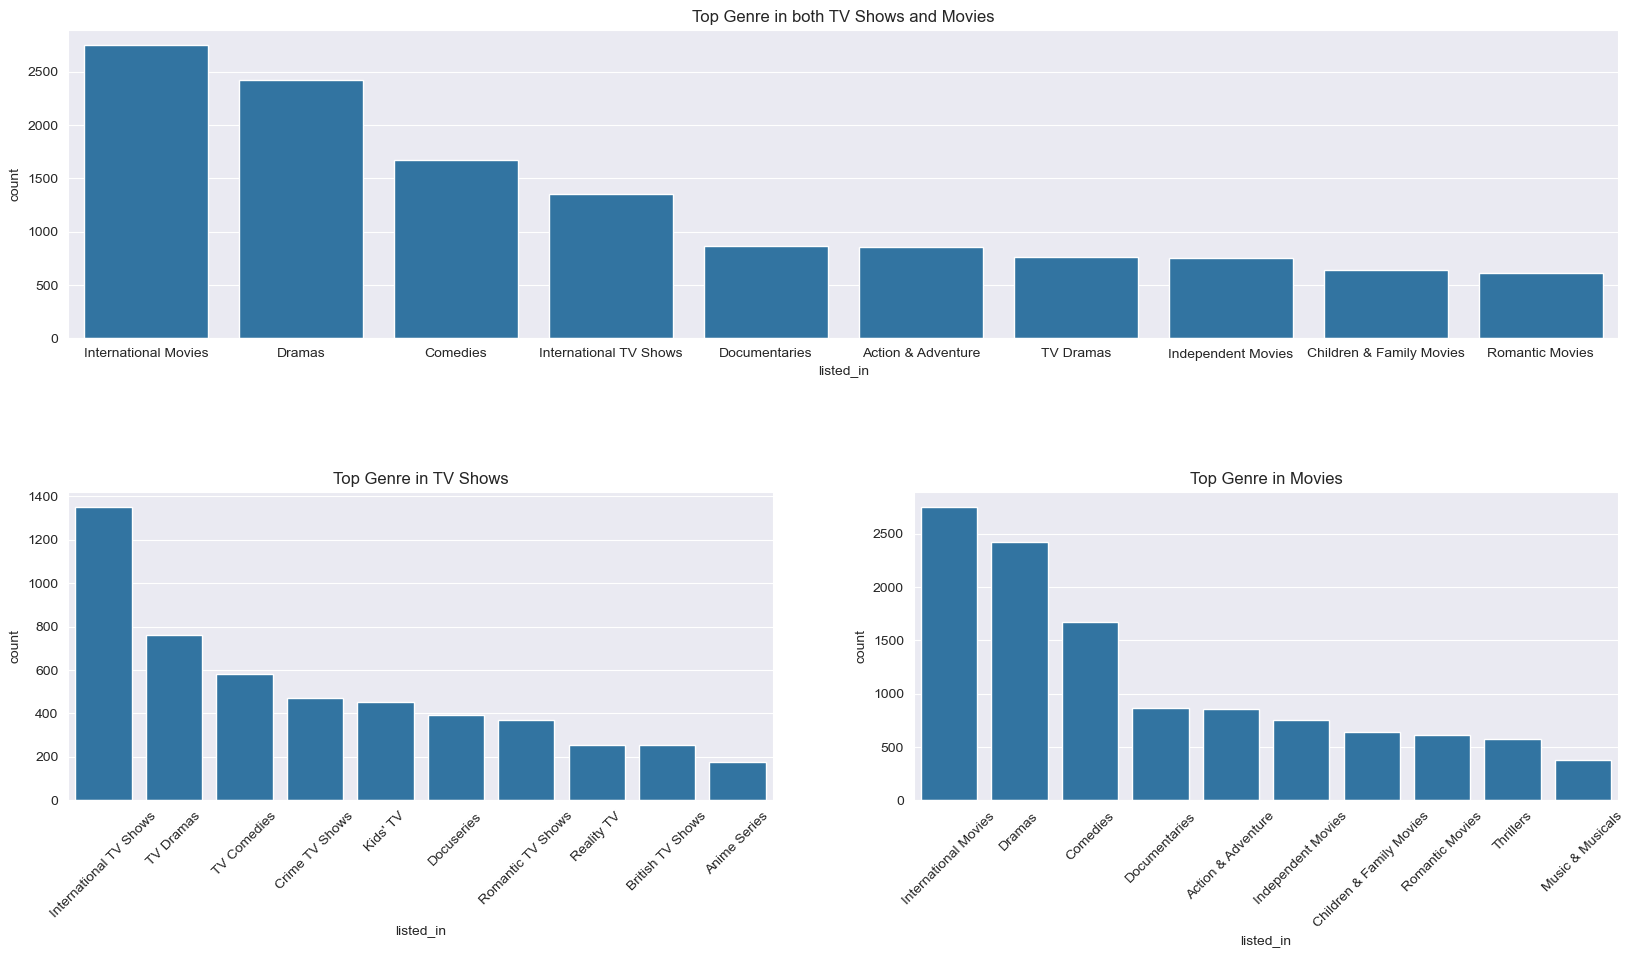

In [315]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.5)


ax1 = plt.subplot(gs[0, :])
sns.barplot(data=ldf, x="listed_in", y="count", ax=ax1)
# ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title("Top Genre in both TV Shows and Movies")

ax2 = plt.subplot(gs[1, 0])
sns.barplot(data=tdf, x="listed_in", y="count", ax=ax2)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title("Top Genre in TV Shows")


ax3 = plt.subplot(gs[1, 1])
sns.barplot(data=mdf, x="listed_in", y="count", ax=ax3)
ax3.set_title("Top Genre in Movies")
ax3.tick_params(axis='x', labelrotation=45);

**<mark>Insights</mark>**

- Above graphs shows the list of top genres present in movies and tv show category
- It appears that users like watching international movies/tv shows, dramas and commedies the most


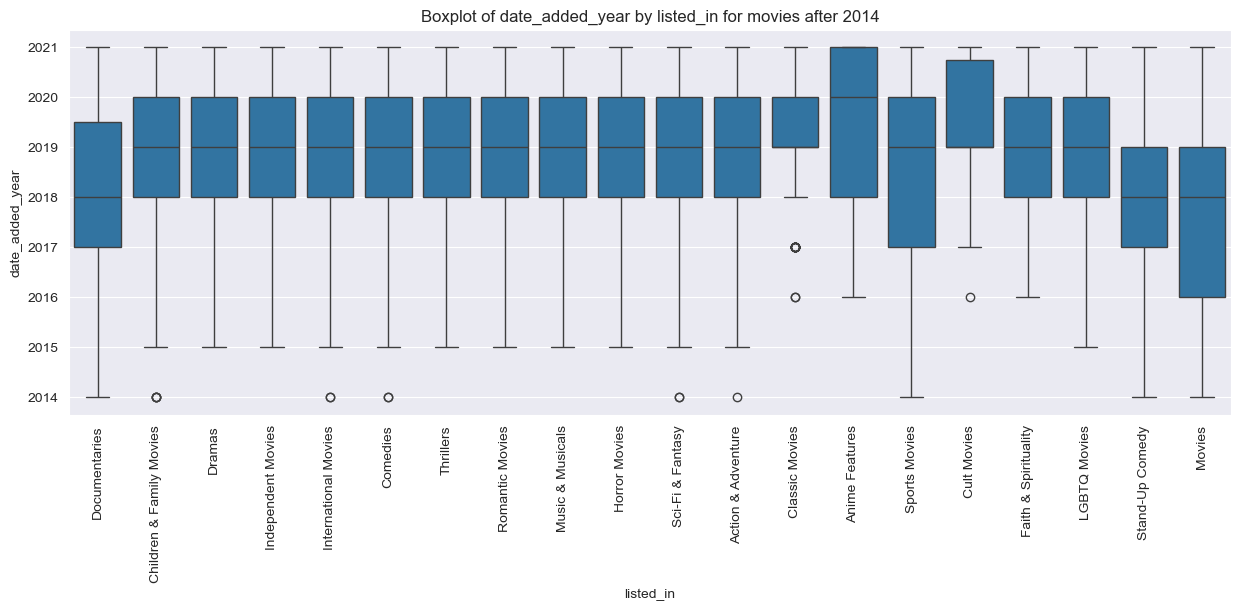

In [316]:
merge_df=movies_df.merge(listed_df, on='show_id', how='inner')
merge_df = merge_df.loc[merge_df['date_added_year'] >= 2014]
plt.figure(figsize=(15, 5))
sns.boxplot(data=merge_df, x="listed_in", y="date_added_year")
plt.title("Boxplot of date_added_year by listed_in for movies after 2014")
plt.xticks(rotation=90);

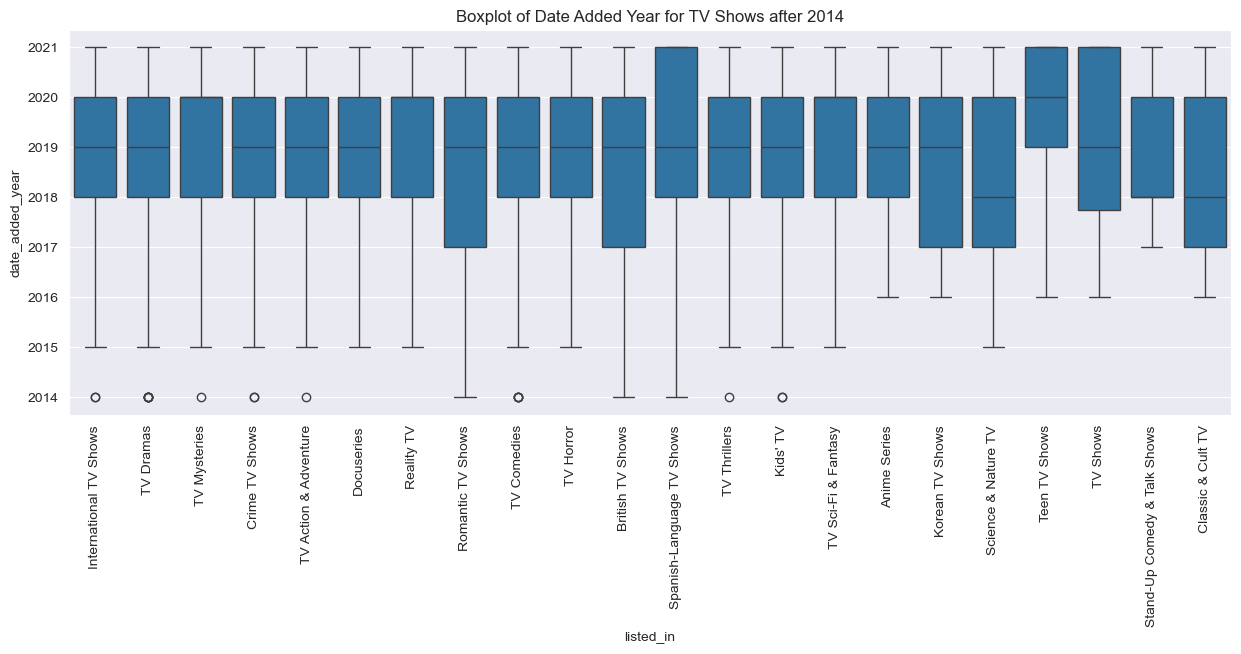

In [317]:
merge_df=tv_shows_df.merge(listed_df, on='show_id', how='inner')
merge_df = merge_df.loc[merge_df['date_added_year'] >= 2014]
plt.figure(figsize=(15, 5))
sns.boxplot(data=merge_df, x="listed_in", y="date_added_year")
plt.title('Boxplot of Date Added Year for TV Shows after 2014')
plt.xticks(rotation=90);

### Director Analysis

In [318]:
director_df.describe()

,show_id,director
count,9612,9612
unique,8807,4994
top,s5888,Unknown
freq,13,2634


In [319]:
merge_df=df.merge(director_df,on='show_id',how='inner')
merge_df.head()

,show_id,type,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,dat_added_period,director
0,s1,Movie,2021-09-25,2020,PG-13,90,2021-09,2021,9,September,2016-2022,Kirsten Johnson
1,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,Unknown
2,s3,TV Show,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,2016-2022,Julien Leclercq
3,s4,TV Show,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,2016-2022,Unknown
4,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,Unknown


In [320]:
ddf = director_df["director"].value_counts()[:11].reset_index()
ddf

,director,count
0,Unknown,2634
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Martin Scorsese,12
9,Jay Chapman,12


**<mark>Insights</mark>**

- Above table shows the list of top directors present in movies and tv shows
- There is lot of missing values in this data, which have been replaced by "Unknown"

In [321]:
ddf = ddf.iloc[1:11]
mdf=merge_df.loc[merge_df["type"]=="Movie"]["director"].value_counts()[1:11].reset_index()
tdf=merge_df.loc[merge_df["type"]=="TV Show"]["director"].value_counts()[1:11].reset_index()
ddf
mdf
tdf

,director,count
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Martin Scorsese,12
9,Jay Chapman,12
10,Youssef Chahine,12


,director,count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Jay Karas,15
5,Marcus Raboy,15
6,Cathy Garcia-Molina,13
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Jay Chapman,12


,director,count
0,Alastair Fothergill,3
1,Ken Burns,3
2,Iginio Straffi,2
3,Gautham Vasudev Menon,2
4,Hsu Fu-chun,2
5,Stan Lathan,2
6,Shin Won-ho,2
7,Joe Berlinger,2
8,Lynn Novick,2
9,Rob Seidenglanz,2


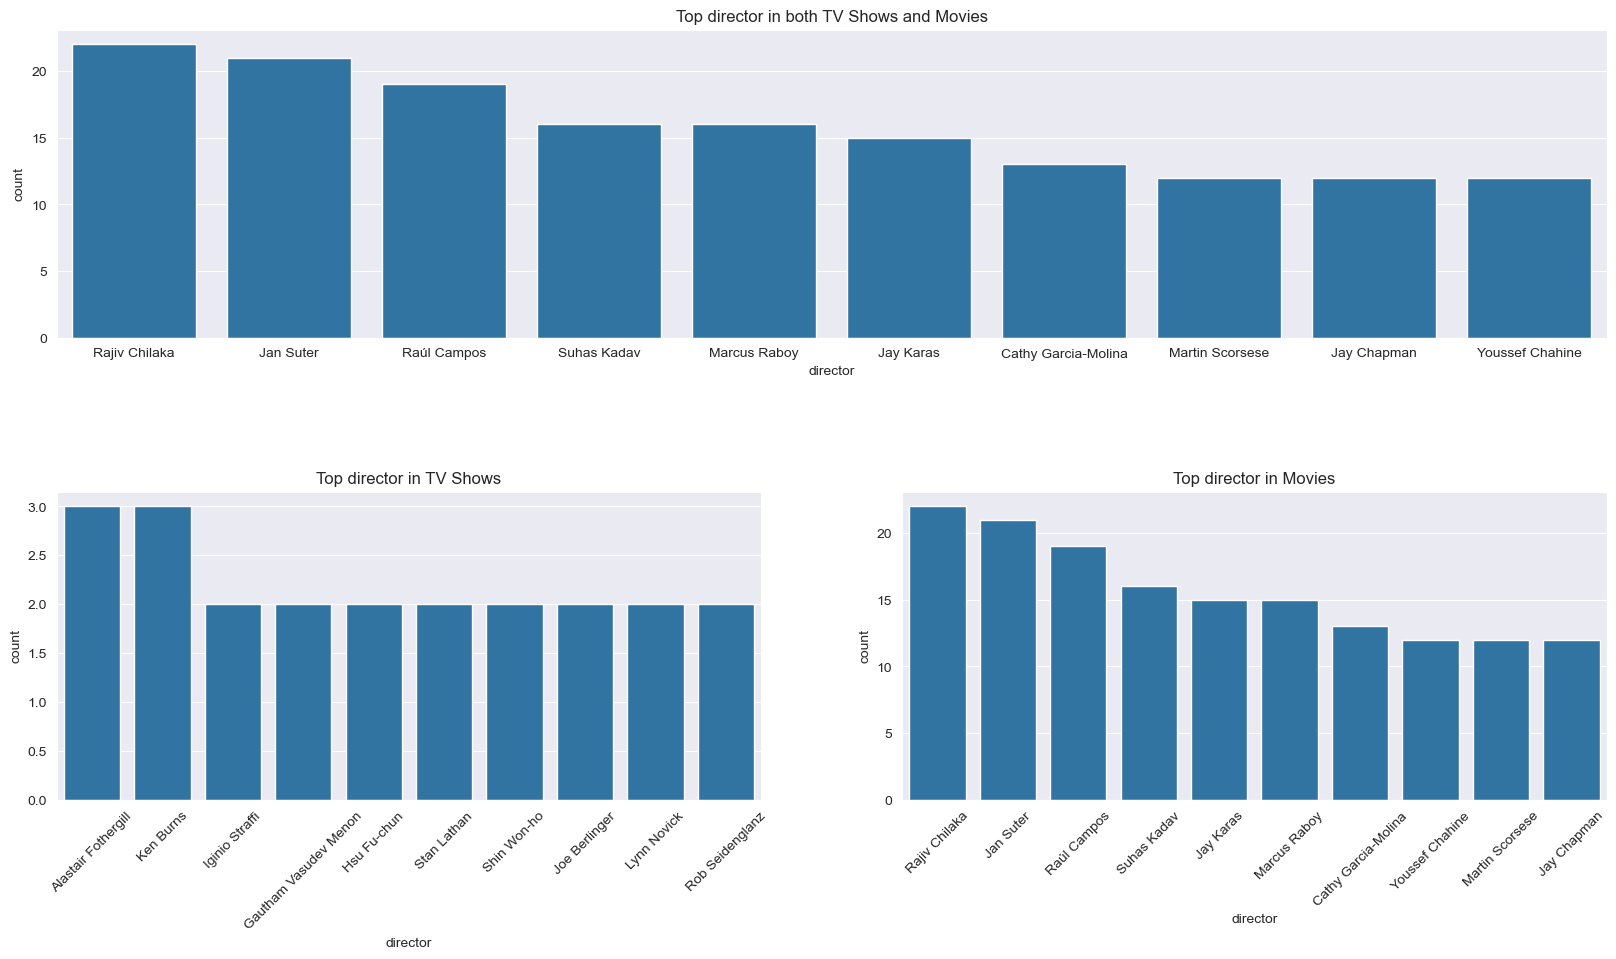

In [322]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.5)


ax1 = plt.subplot(gs[0, :])
sns.barplot(data=ddf, x="director", y="count", ax=ax1)
ax1.set_title("Top director in both TV Shows and Movies")

ax2 = plt.subplot(gs[1, 0])
sns.barplot(data=tdf, x="director", y="count", ax=ax2)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title("Top director in TV Shows")


ax3 = plt.subplot(gs[1, 1])
sns.barplot(data=mdf, x="director", y="count", ax=ax3)
ax3.set_title("Top director in Movies")
ax3.tick_params(axis='x', labelrotation=45);

**<mark>Insights</mark>**

- Above graphs shows the list of top directors present in movies and tv shows

### Release Timeline Analysis

#### Analysis of all time data

In [323]:
stream_timeline=df.groupby(["date_added_year_month","type"])["show_id"].count().reset_index().set_index("date_added_year_month")
stream_timeline.head()

,type,show_id
date_added_year_month,,
2008-01,Movie,1
2008-01,TV Show,0
2008-02,Movie,0
2008-02,TV Show,1
2009-05,Movie,1


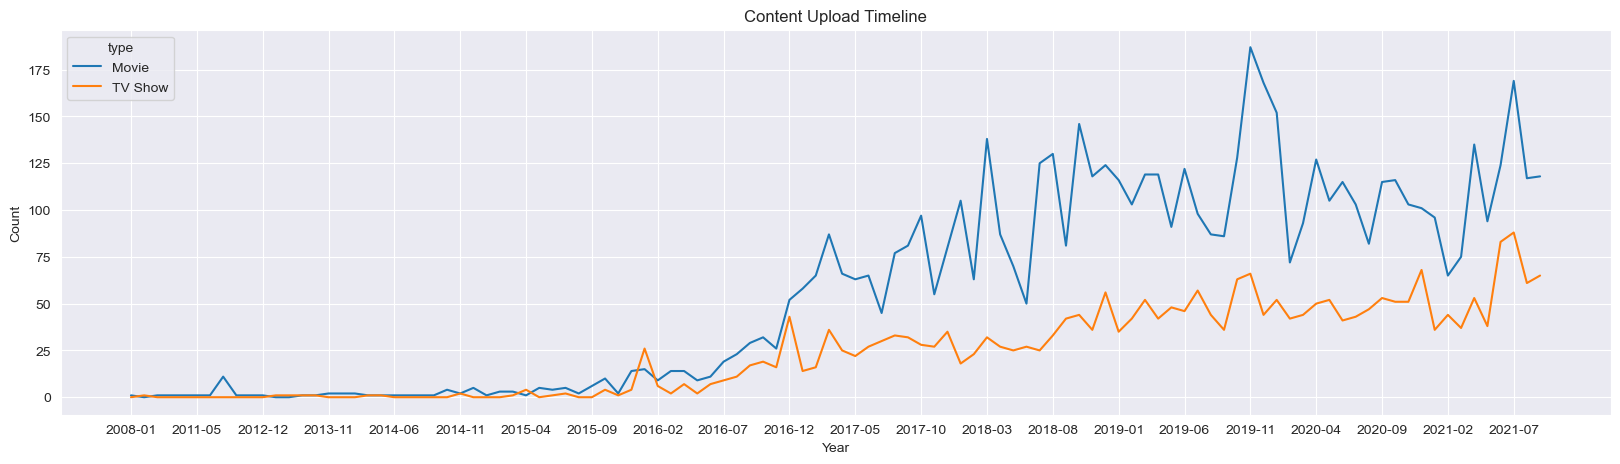

In [324]:
plt.figure(figsize=(20,5))
# fig, ax = plt.subplots(figsize=(20, 5))
l=sns.lineplot(data=stream_timeline, x="date_added_year_month", y="show_id", hue="type")
l.set(xlabel="Year", ylabel="Count");
l.set_title("Content Upload Timeline");
l.set_xticks(l.get_xticks()[::5]);
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
# plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))

**<mark>Insights</mark>**

- From above graph, we can see that majority of content got added after 2015.
- Over the years, the amount of tv shows added were comparatively less than movies.

In [325]:
monthly_release=df.groupby(["date_added_month","date_added_month_name","type"])["show_id"].count().reset_index().set_index("date_added_month")
monthly_release.head()

,date_added_month_name,type,show_id
date_added_month,,,
1,April,Movie,0
1,April,TV Show,0
1,August,Movie,0
1,August,TV Show,0
1,December,Movie,0


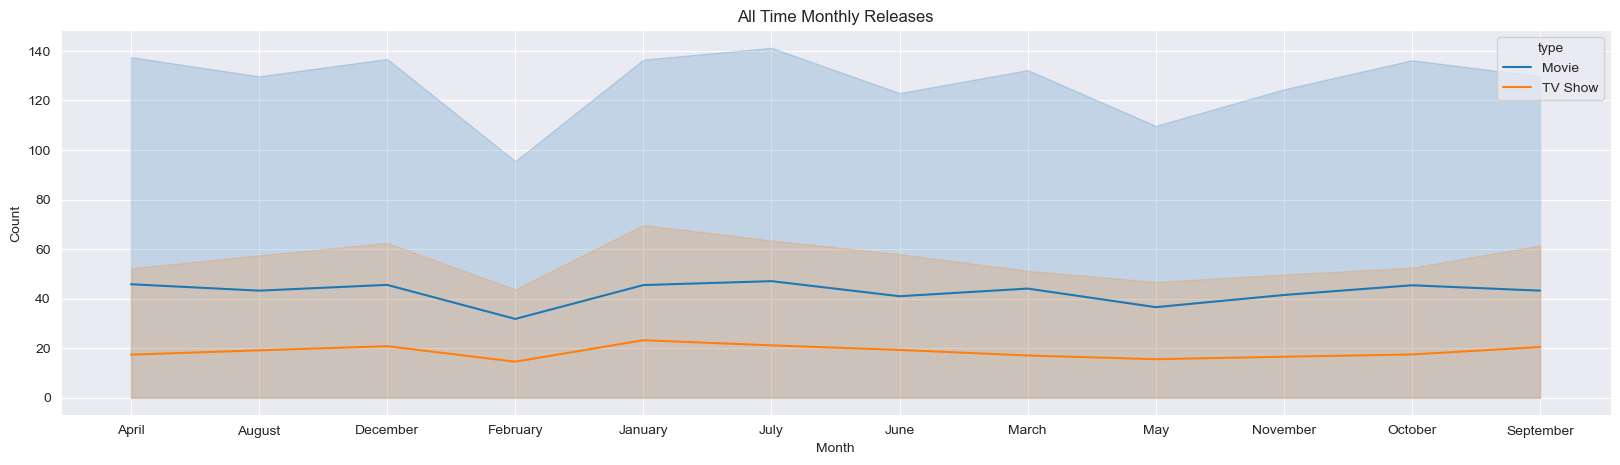

In [326]:
plt.figure(figsize=(20,5))

lp=sns.lineplot(data=monthly_release, x="date_added_month_name", y="show_id", hue="type")
lp.set(xlabel="Month", ylabel="Count");
lp.set_title("All Time Monthly Releases");

#### Analysis of latest data

In [327]:
latest_data=df.loc[df["dat_added_period"].isin(["2016-2022"])]

In [328]:
monthly_release_latest=latest_data.groupby(["date_added_month","date_added_month_name","type"])["show_id"].count().reset_index().set_index("date_added_month")
monthly_release.head()

,date_added_month_name,type,show_id
date_added_month,,,
1,April,Movie,0
1,April,TV Show,0
1,August,Movie,0
1,August,TV Show,0
1,December,Movie,0


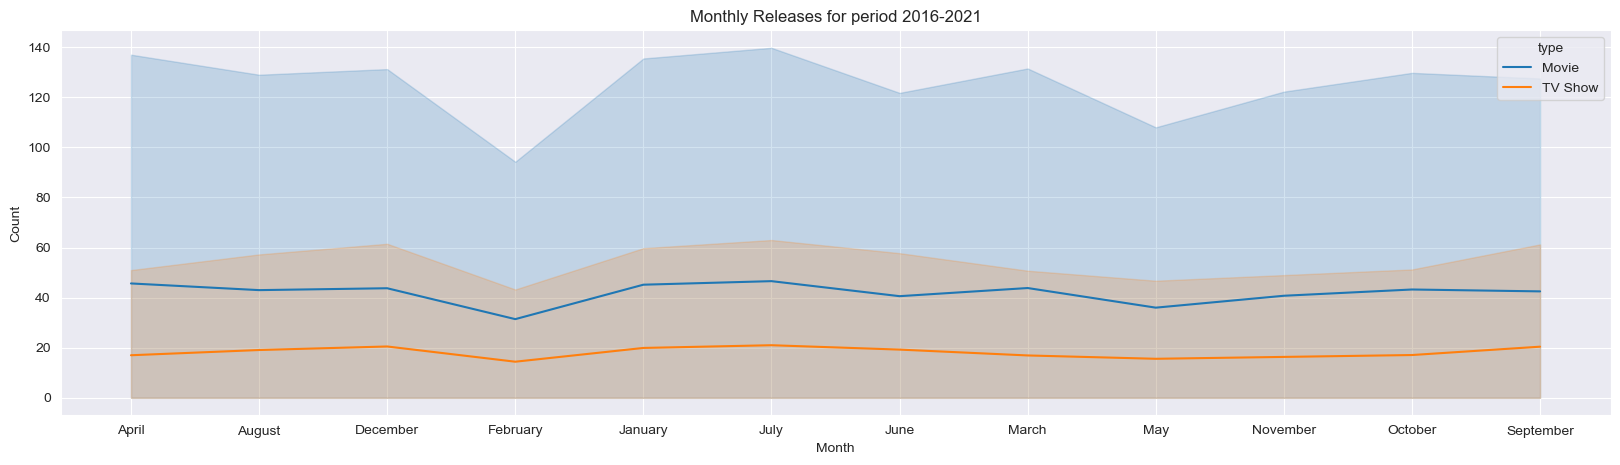

In [329]:
plt.figure(figsize=(20,5))

lp=sns.lineplot(data=monthly_release_latest, x="date_added_month_name", y="show_id", hue="type")
lp.set(xlabel="Month", ylabel="Count");
lp.set_title("Monthly Releases for period 2016-2021");

**<mark>Insights</mark>**

- From above graph, we can see that majority of content got added in July and April and least content was added in February and May

### Movie and TV Show Distribution analysis

<Axes: xlabel='type', ylabel='count'>

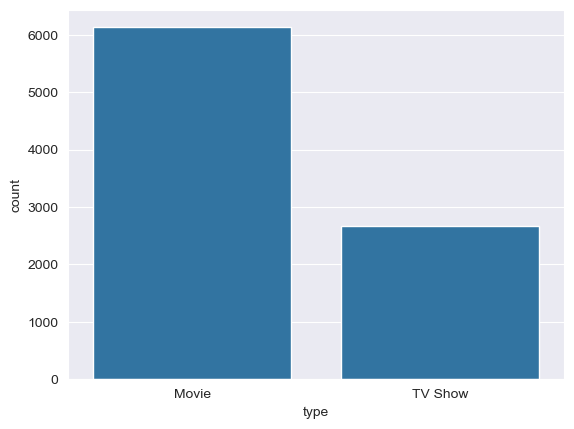

In [330]:
sns.countplot(data=df, x="type")

### Rating Analyisis

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='rating', ylabel='count'>

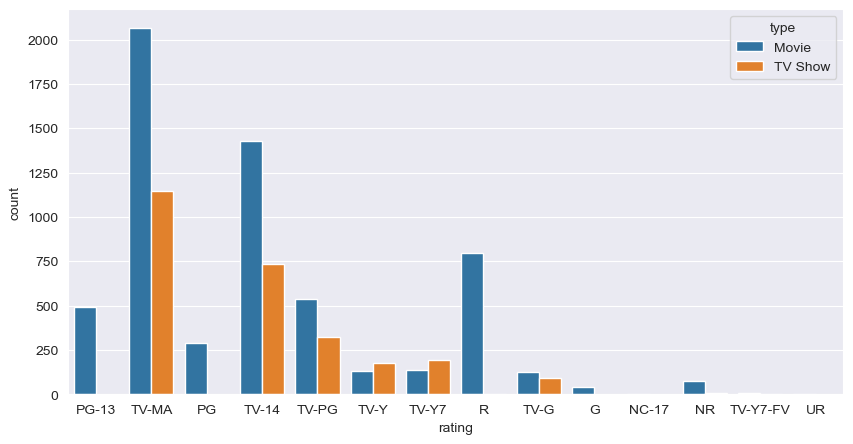

In [331]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="rating", hue="type")

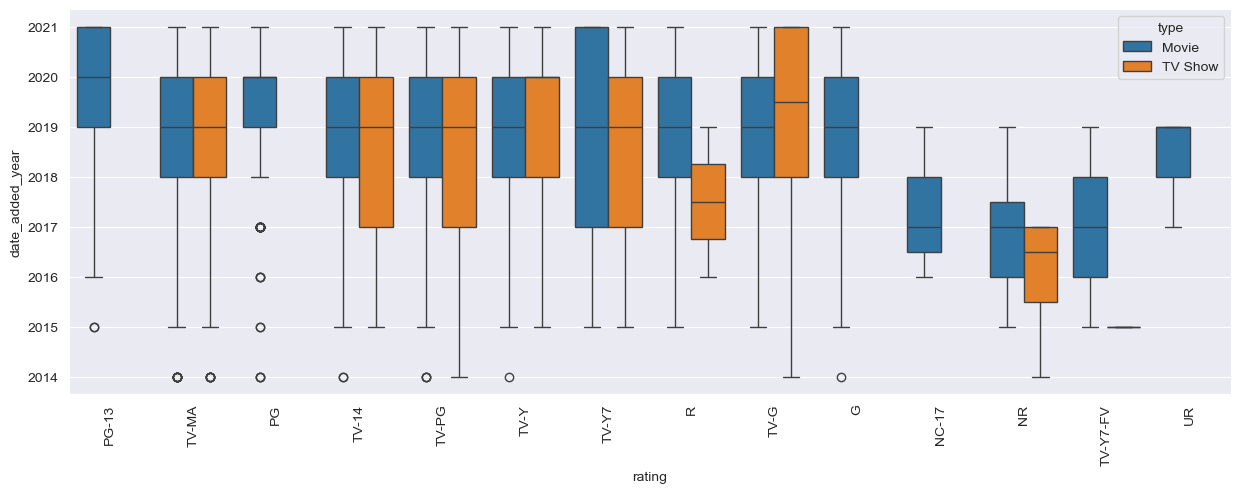

In [332]:

plt.figure(figsize=(15, 5))
rating_df = df.loc[df['date_added_year'] >= 2014]
sns.boxplot(data=rating_df, x="rating", y="date_added_year", hue="type")
plt.xticks(rotation=90);

**<mark>Insights</mark>**

- No particular pattern is observed with respect rating of content realesed over time

### Duration Anaylsis

In [333]:
tv_shows_df["duration"].value_counts()

duration
1     1793
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
10       7
13       3
15       2
12       2
11       2
17       1
Name: count, dtype: int64

In [353]:
tv_shows_df.sort_values(by="duration", ascending=False)

,show_id,type,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,dat_added_period
204,s549,TV Show,2021-07-03,2020,TV-14,17,2021-07,2021,7,July,2016-2022
842,s2424,TV Show,2020-06-05,2019,TV-14,15,2020-06,2020,6,June,2016-2022
1726,s4799,TV Show,2018-07-01,2017,TV-14,15,2018-07,2018,7,July,2016-2022
461,s1355,TV Show,2021-02-01,2019,TV-14,13,2021-02,2021,2,February,2016-2022
1545,s4221,TV Show,2019-01-01,2019,TV-MA,13,2019-01,2019,1,January,2016-2022
...,...,...,...,...,...,...,...,...,...,...,...
1412,s3854,TV Show,2019-05-07,2019,TV-14,1,2019-05,2019,5,May,2016-2022
1411,s3853,TV Show,2019-05-07,2019,TV-14,1,2019-05,2019,5,May,2016-2022
1410,s3852,TV Show,2019-05-08,2016,TV-14,1,2019-05,2019,5,May,2016-2022
1409,s3851,TV Show,2019-05-08,2016,TV-PG,1,2019-05,2019,5,May,2016-2022


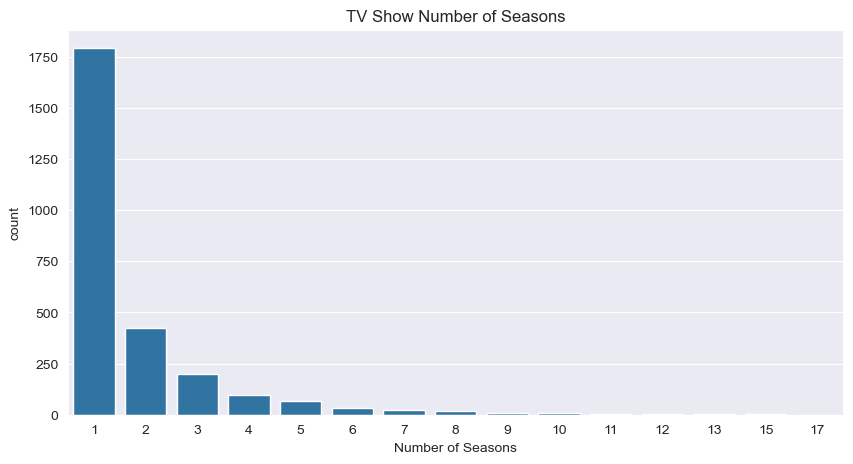

In [335]:
plt.figure(figsize=(10,5))
sns.countplot(data=tv_shows_df, x="duration")
plt.title("TV Show Number of Seasons")
plt.xlabel("Number of Seasons");

<mark>**Insights**</mark>

- According to histogram data, we can see that majority of the tv shows have a duration of 1 season

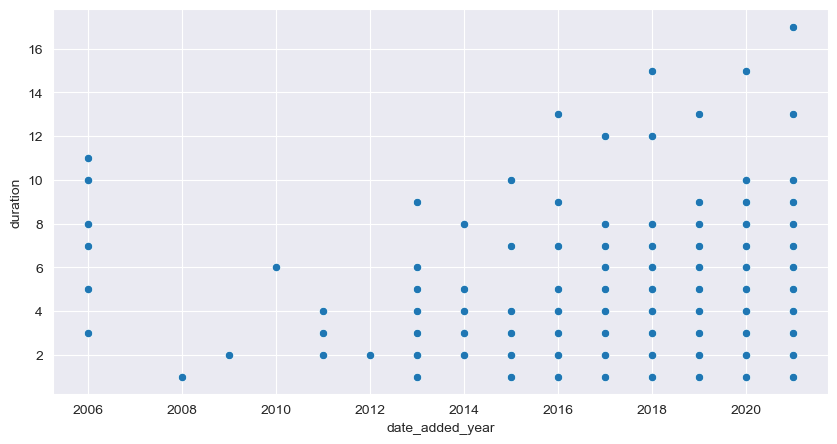

In [336]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=tv_shows_df, x="date_added_year", y="duration");

<mark>**Insights**</mark>

- No particular pattern is visble in above visualizations.

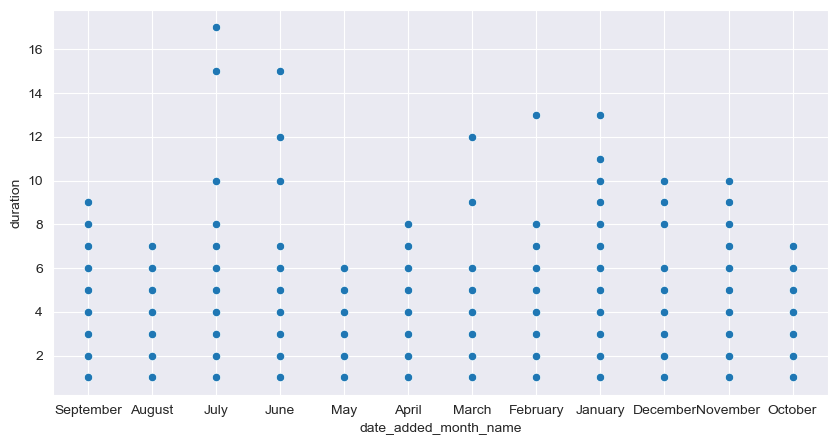

In [337]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=tv_shows_df, x="date_added_month_name", y="duration");

In [338]:
movies_df["duration"].value_counts()

duration
90     152
94     146
97     146
93     146
91     144
      ... 
208      1
5        1
16       1
186      1
191      1
Name: count, Length: 205, dtype: int64

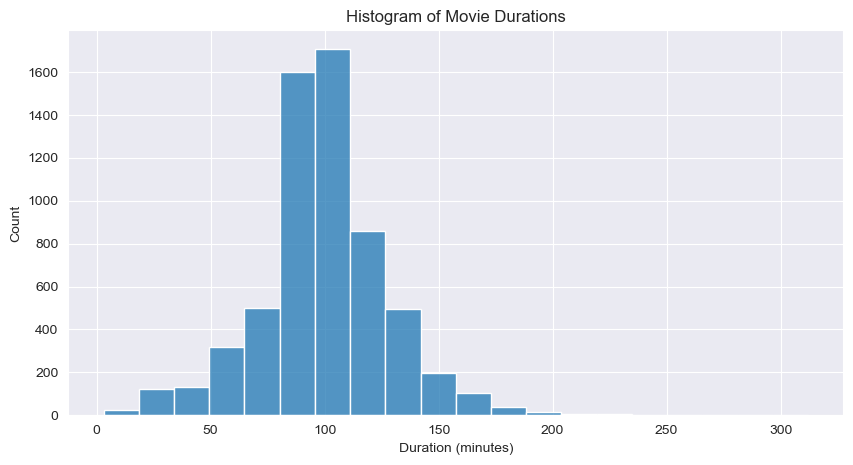

In [339]:
plt.figure(figsize=(10,5))
sns.histplot(data=movies_df, x="duration", bins=20)
plt.title("Histogram of Movie Durations")
plt.xlabel("Duration (minutes)");

<mark>**Insights**</mark>

- According to histogram data, we can see that majority of the movies have a duration of 90min - 120min.

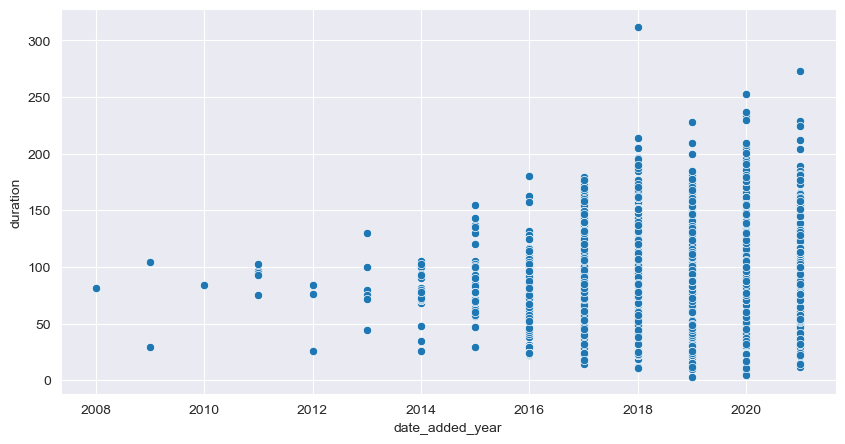

In [340]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=movies_df, x="date_added_year", y="duration");

<mark>**Insights**</mark>

- There appears to be increase in movie duration over the years.

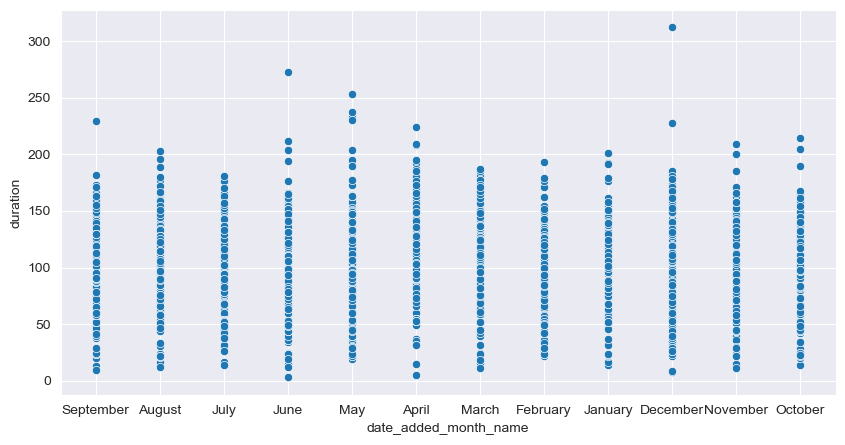

In [341]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=movies_df, x="date_added_month_name", y="duration");

<Axes: >

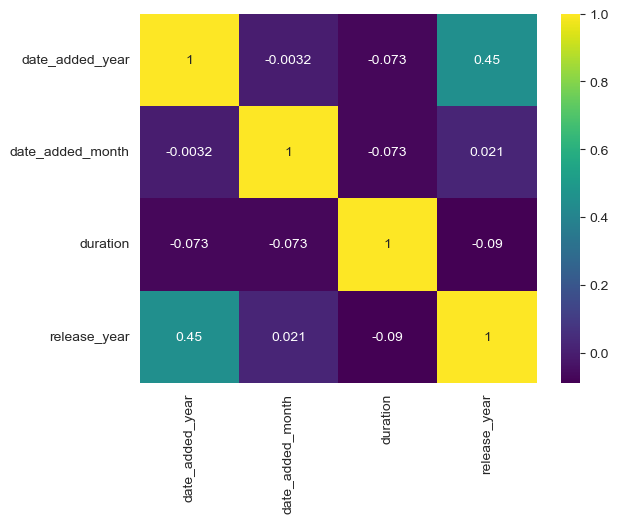

In [342]:
sns.heatmap(tv_shows_df[["date_added_year","date_added_month","duration","release_year"]].corr(), annot=True, cmap="viridis");

<Axes: >

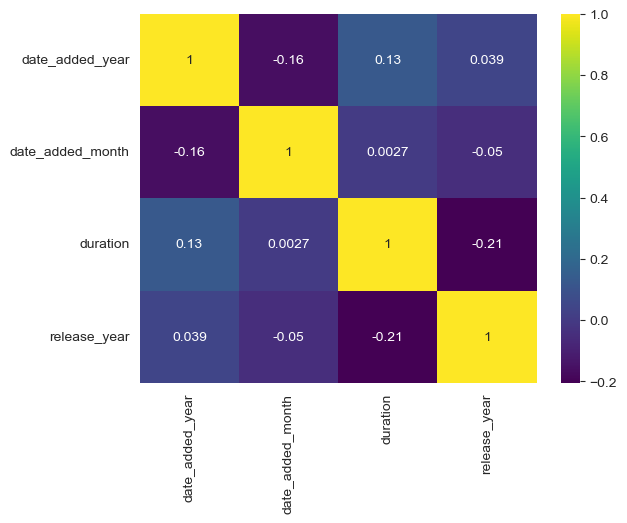

In [343]:
sns.heatmap(movies_df[["date_added_year","date_added_month","duration","release_year"]].corr(), annot=True, cmap="viridis");

### More Detailed Anaysis

In [344]:
non_top_3_countrries

['Canada',
 'France',
 'Japan',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico',
 'China',
 'Australia',
 'Egypt',
 'Turkey',
 'Hong Kong',
 'Nigeria',
 'Italy',
 'Brazil',
 'Argentina',
 'Indonesia',
 'Belgium',
 'Taiwan',
 'Philippines',
 'Thailand']

#### Top genres in Non Top 3 countries

In [354]:
merge_df = df.merge(country_df, on="show_id")
merge_df = merge_df.merge(listed_df, on="show_id")

In [379]:
gp=merge_df.groupby(["country","type","listed_in"])["show_id"].count().reset_index().rename(columns={"show_id":"count"})
gp["rank"]=gp.groupby(["country","type"])["count"].rank(method="first",ascending=False)
gp=gp.loc[gp["rank"] < 4].sort_values(by='country')
suggested_movie_genres =  gp.loc[gp["country"].isin(non_top_3_countrries) & (gp["type"]=='Movie')].sort_values(by=["country","rank"]).drop(["type","count"], axis=1)
suggested_movie_genres.head(10)

,country,listed_in,rank
352,Argentina,International Movies,1.0
348,Argentina,Dramas,2.0
343,Argentina,Comedies,3.0
516,Australia,Dramas,1.0
520,Australia,International Movies,2.0
508,Australia,Children & Family Movies,3.0
1024,Belgium,International Movies,1.0
1020,Belgium,Dramas,2.0
1015,Belgium,Comedies,3.0
1276,Brazil,International Movies,1.0


In [380]:
suggested_tv_genres =  gp.loc[gp["country"].isin(non_top_3_countrries) & (gp["type"]=='TV Show')].sort_values(by=["country","rank"]).drop(["type","count"], axis=1)
suggested_tv_genres.head(10)
# pd.reset_option('display.max_rows')

,country,listed_in,rank
406,Argentina,Spanish-Language TV Shows,1.0
395,Argentina,International TV Shows,2.0
386,Argentina,Crime TV Shows,3.0
563,Australia,International TV Shows,1.0
564,Australia,Kids' TV,2.0
580,Australia,TV Dramas,3.0
1067,Belgium,International TV Shows,1.0
1058,Belgium,Crime TV Shows,2.0
1084,Belgium,TV Dramas,3.0
1319,Brazil,International TV Shows,1.0


In [384]:
pd.set_option('display.max_rows', None)
suggested_movie_genres.merge(suggested_tv_genres, on=['country','rank']).rename(columns={'listed_in_x':'Movie Genre', 'listed_in_y':'TV Genres'})

,country,Movie Genre,rank,TV Genres
0,Argentina,International Movies,1.0,Spanish-Language TV Shows
1,Argentina,Dramas,2.0,International TV Shows
2,Argentina,Comedies,3.0,Crime TV Shows
3,Australia,Dramas,1.0,International TV Shows
4,Australia,International Movies,2.0,Kids' TV
5,Australia,Children & Family Movies,3.0,TV Dramas
6,Belgium,International Movies,1.0,International TV Shows
7,Belgium,Dramas,2.0,Crime TV Shows
8,Belgium,Comedies,3.0,TV Dramas
9,Brazil,International Movies,1.0,International TV Shows


<mark>**Insights**</mark>

- Above table consist of top movie and tv genres in each country.

#### Top ratings in Non Top 3 countries

In [385]:
gp=merge_df.groupby(["country","type","rating"])["show_id"].count().reset_index().rename(columns={"show_id":"count"})

In [386]:
gp["rank"]=gp.groupby(["country","type"])["count"].rank(method="first",ascending=False)
gp=gp.loc[gp["rank"] < 4].sort_values(by='country')

In [392]:
suggested_tv_ratings =  gp.loc[gp["country"].isin(non_top_3_countrries) & (gp["type"]=='TV Show')].sort_values(by=["country","rank"]).drop(["count","type"], axis=1)
suggested_tv_ratings.head(10)

,country,rating,rank
134,Argentina,TV-MA,1.0
132,Argentina,TV-14,2.0
136,Argentina,TV-Y,3.0
190,Australia,TV-MA,1.0
191,Australia,TV-PG,2.0
188,Australia,TV-14,3.0
358,Belgium,TV-MA,1.0
356,Belgium,TV-14,2.0
361,Belgium,TV-Y7,3.0
442,Brazil,TV-MA,1.0


In [393]:
suggested_movie_ratings =  gp.loc[gp["country"].isin(non_top_3_countrries) & (gp["type"]=='Movie')].sort_values(by=["country","rank"]).drop(["count","type"], axis=1)
suggested_movie_ratings.head(10)

,country,rating,rank
120,Argentina,TV-MA,1.0
118,Argentina,TV-14,2.0
121,Argentina,TV-PG,3.0
173,Australia,R,1.0
176,Australia,TV-MA,2.0
171,Australia,PG,3.0
344,Belgium,TV-MA,1.0
341,Belgium,R,2.0
339,Belgium,PG,3.0
428,Brazil,TV-MA,1.0


In [394]:
suggested_movie_ratings.merge(suggested_tv_ratings, on=['country','rank']).rename(columns={'rating_x':'Movie Rating', 'rating_y':'TV Rating'})

,country,Movie Rating,rank,TV Rating
0,Argentina,TV-MA,1.0,TV-MA
1,Argentina,TV-14,2.0,TV-14
2,Argentina,TV-PG,3.0,TV-Y
3,Australia,R,1.0,TV-MA
4,Australia,TV-MA,2.0,TV-PG
5,Australia,PG,3.0,TV-14
6,Belgium,TV-MA,1.0,TV-MA
7,Belgium,R,2.0,TV-14
8,Belgium,PG,3.0,TV-Y7
9,Brazil,TV-MA,1.0,TV-MA


<mark>**Insights**</mark>

- Above table consist of top movie and tv ratings in each country.

## Insights